<h1 align="center">Python performance exercises</h1>

## Python best practices exercises

### Exercise 1

considering the following function for concatenating list strings with deliter.

In [8]:
def ft_concatenate(l_strings, d):
    """concatenate list of strings into  one string separated by delimeter"""
    res = l_strings[0]
    for e in l_strings[1:]:
        res = res + d + e
    return res

In [9]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [10]:
L=[]
for i in range(300):
    L.append('a'*100)
%lprun -f ft_concatenate ft_concatenate(L, ' ')

- profile the function and identify the bottlenecks.
- improve speed up of the function
*Hint: you may need to look to the string functions in python documentation*

In [11]:
# write your code here
def ft_concatenate_1(l_strings, d):
    """concatenate list of strings into one  string separated by delimeter"""
    return d.join(l_strings)
string = ['this', 'is', 'a', 'test']
d = ' '

%prun ft_concatenate_1(L, d)

### Exercise 2

In this exercise you will solve the following problem using two methods bruteforce mehode, and fast method.

**Problem:** You are given a list of n integers, and your task is to calculate the number of distinct values in the list.

**Example**
- Input:
5
2 3 2 2 3

- Output:
2

**Implement the following methodes:**

1. **bruteforce mehode:** create an empty list and start adding items for the given list without adding the previous item add, at the end the result list will contain unique values, print lenght of the list and you are done. 
2. **fast method** think of using Set data structure.

- time the two methods, what do you think?

In [12]:
# bruteforce fast method
def burteforce(ipt):
    res = []
    for i in ipt:
        if i not in res:
            res.append(i)
    return len(res)


In [13]:
# write fast method
def fast_method(ipt):
    return len(set(ipt))
    

In [14]:
# Creat two random lists of numbers 
import numpy as np
l = [np.random.rand() for i in range(100)]
# time the 2nd methods
%timeit burteforce(l)

48 µs ± 421 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%timeit fast_method(l)

5.75 µs ± 46.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Cython exercises

### Exercise 1

1. load the cython extension.

In [16]:
from distutils.core import setup
from Cython.Build import cythonize


2. Condidering the following polynome function:

In [17]:
def poly(a,b):
    return 10.5 * a + 3 * (b**2)

- Create an equivalent Cython function of `poly` with name `poly_cy` without any cython improvement, just make its cell a cython cell.

3. time the performance of Python and Cython version of the function, what is the factor of speed up here between the two verions.

In [18]:
%load_ext cython

In [19]:
%%cython -a
cpdef ploy_cy(float a,float b):
    return 10.5 * a + 3 * (b**2)


In [20]:
%timeit poly(3, 5)
%timeit ploy_cy(3, 5)

281 ns ± 3.97 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
84.9 ns ± 0.285 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


4. Now lets work on another examples using loop.
    - rewrite the same function below fib that calculate fibonacci series using cython, but now try to add type for the variables used inside it, add a prefix `_cy` to your new cython function.

In [21]:
def fib(n):
    a, b = 1, 1
    for i in range(n):
        a, b = a + b, a

    return a

In [22]:
%%cython -a
cpdef fib_cy(int n):
    cdef int a, b
    a,b = 1,1
    cdef int i=0
    for i in range(n):
        a, b = a + b, a

    return a


- time the two function for fibonacci series, with n = 20, what is the factor of speed now, What do you think?

In [ ]:
# write your code here
%timeit fib(20)

In [ ]:
%timeit fib_cy(20)

5. Recursive functions are functions that call themselves during their execution. Another interesting property of the Fibonacci series is that it can be written as a recursive function. That’s because each item depends on the values of other items (namely item n-1 and item n-2)

- Rewrite the fib function using recursion. Is it faster than the non-recursive version? Does Cythonizing it give even more of an advantage? 

In [ ]:
# write your code here
cache =[-1 for i in range(100)]
def fib_rec(n):
    if cache[n]!=-1:
        return cache[n]
    if n == 1:
        return 1
    elif n <= 0:
        return 0
    else:
        cache[n] = fib_rec(n-1)+fib_rec(n-2)
        return cache[n]


In [ ]:
%%cython
cpdef fib_rec_cy(int n):
    if n == 1:
        return 1
    elif n <= 0:
        return 0
    else:
        return fib_rec_cy(n-1)+fib_rec_cy(n-2)


In [ ]:
%timeit fib_rec(20)

In [ ]:
%timeit fib_rec_cy(20)

### Exercise 2

- Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. 
- One of the basic examples of getting started with the Monte Carlo algorithm is the estimation of Pi.

**Estimation of Pi**

- The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 1 unit. 
- Imagine a circle inside the same domain with same diameter and inscribed into the square. 
- We then calculate the ratio of number points that lied inside the circle and total number of generated points. 
- Refer to the image below:

![demo](../data/MonteCarloPlot.png)

We know that area of the square is 1 unit sq while that of circle is $\pi \ast  (\frac{1}{2})^{2} = \frac{\pi}{4}$. Now for a very large number of generated points,

![demo](../data/MonteCarloCalc.png)


## The Algorithm

1. Initialize cile_points, square_points and interval to 0.
2. Generate random point x.
3. Generate random point y.
4. Calculate d = x*x + y*y.
5. If d <= 1, increment circle_points.
6. Increment square_points.
7. Increment interval.
8. If increment < NO_OF_ITERATIONS, repeat from 2.
9. Calculate pi = 4*(circle_points/square_points).
10. Terminate.

**Your mission:** time the function `monte_carlo_pi`, identify the bottlenecks and create a new version using cython functionality to speed up monte carlo simulation for PI, use 100,000 points and compare the speed up factor between python and cython, considering the following optimizations:
- add type for variables used.
- add type for the function
- use c rand function instead of python rand function.
 
*Hint: you can import function from C libraries using the following approach `from libc.<name of c library> cimport <library function name>`, replace the holders `<>` with the right identities for the current problem*

In [ ]:
import random
def monte_carlo_pi(nsamples):
    pi = 0.
   # Implement your code here
    cile_points = 0
    square_points = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        d = x**2 + y**2
        if d<=1:
            cile_points += 1
        square_points += 1
    return 4*(cile_points/square_points)

In [ ]:
%%cython
import random
from libc.stdlib cimport rand
cpdef monte_carlo_pi_cy(int nsamples):
    cdef float pi = 0
    
   # Implement your code here
    cdef int cile_points=0
    cdef int square_points=0 
    cdef float x, y, d
    cdef int INT_MAX=2147483647
    for i in range(nsamples):
        x = rand() / float(INT_MAX)
        y = rand() / float(INT_MAX)
        d = x**2 + y**2
        if d<=1:
            cile_points += 1
        square_points += 1
    pi=4*(cile_points/square_points)
    return pi


In [ ]:
%timeit monte_carlo_pi(10000000)

In [ ]:
%timeit monte_carlo_pi_cy(10000000)

## Numba exercises

### Exercise 1

Previously we considered how to approximateby Monte Carlo.

- Use the same idea here, but make the code efficient using Numba.
- Compare speed with and without Numba when the sample size is large.

In [ ]:
# Your code here
from numba import jit

@jit(nopython=True)

def monte_carlo_pi_1(nsamples):
    pi = 0.
   # Implement your code here
    cile_points = 0
    square_points = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        d = x**2 + y**2
        if d<=1:
            cile_points += 1
        square_points += 1
    return 4*(cile_points/square_points)

In [ ]:
%timeit monte_carlo_pi_1(10000000)

### Exercise 2 optional

In the [Introduction to Quantitative Economics](https://python.quantecon.org/intro.html) with Python lecture series you can learn all about finite-state Markov chains.

For now, let's just concentrate on simulating a very simple example of such a chain.

Suppose that the volatility of returns on an asset can be in one of two regimes — high or low.

The transition probabilities across states are as follows ![markov](../data/markov.png)

For example, let the period length be one day, and suppose the current state is high.

We see from the graph that the state tomorrow will be

- high with probability 0.8

- low with probability 0.2

Your task is to simulate a sequence of daily volatility states according to this rule.

Set the length of the sequence to `n = 1_000_000` and start in the high state.

Implement a pure Python version and a Numba version, and compare speeds.

To test your code, evaluate the fraction of time that the chain spends in the low state.

If your code is correct, it should be about 2/3.

Hints:

- Represent the low state as 0 and the high state as 1.

- If you want to store integers in a NumPy array and then apply JIT compilation, use `x = np.empty(n, dtype=np.int_)`.


In [1]:
import numpy as np

P = np.array([[0.9, 0.1], [0.2, 0.8]])
%time
np.linalg.matrix_power(P, 1000000)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10.5 µs


array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

In [33]:
from numba import jit

@jit(nopython=True)

def ex():
    return np.linalg.matrix_power(P, 1000000)

In [32]:
%time
ex()

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 20.5 µs


array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

In [107]:
daily_volatility_states = []

#lets start in state 1 (high)
daily_volatility_states.append(1)
j=1
while j < 1000000:
    p = np.random.rand()
    if daily_volatility_states[j-1] == 1:
        if p >= 0.8:
            daily_volatility_states.append(1)
            j=j+1
        elif p <= 0.2:
            daily_volatility_states.append(0)
            j=j+1
    elif daily_volatility_states[j-1] == 0:
        if p >= 0.9:
            daily_volatility_states.append(0)
            j=j+1
        elif p <= 0.1:
            daily_volatility_states.append(1)
            j=j+1

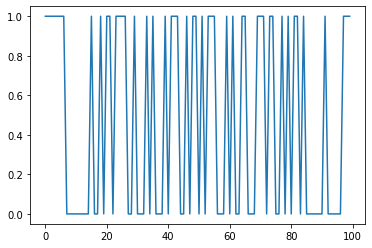

In [108]:
import matplotlib.pyplot as plt

plt.plot(daily_volatility_states[:100])

In [109]:
state0 = [x for x in daily_volatility_states if x==0]
state1 = [x for x in daily_volatility_states if x==1]
print(len(state0)/len(daily_volatility_states))
print(len(state1)/len(daily_volatility_states))

0.500365
0.499635
